In [1]:
%matplotlib ipympl
from mpl_toolkits.mplot3d import axes3d
import matplotlib.pyplot as plt
import numpy as np
# from scipy.special import genlaguerre    #genlaguerre(n, alpha)
import matplotlib as mpl

# from matplotlib.lines import Line2D
import ipywidgets as widgets
from matplotlib.pyplot import MultipleLocator
from matplotlib.colors import LinearSegmentedColormap
from mpl_toolkits.axes_grid1 import make_axes_locatable
# import scipy.ndimage

In [2]:
W = 1.5 #um(10**-6m)

def Factorial(n):
    f=1
    for i in range(1,n+1,1):
        f*=i 
    return f

def Laguerre(rho,l,p):
    l = np.abs(l)
    L = 0
    for m in range(p+1):
        L += (-1)**m * Factorial(l+p) / (Factorial(p-m)*Factorial(l+m)*Factorial(m)) * (2*(rho/W)**2)**m
    return L

def f(rho,l,p):
    l = np.abs(l)
    f = np.sqrt((Factorial(p)*2)/(np.pi*Factorial(l+p))) * np.exp(-(rho/W)**2) * (np.sqrt(2)*rho/W)**l * Laguerre(rho,l,p)
    return f 
    
def u(phi,rho,l,p):
    u = f(rho,l,p) * np.exp(complex(0,1)*l*phi)
    return u

def ux(phi,rho,l1,l2,p,beta,alpha):
    ux = (1*np.cos(beta/2)*u(phi,rho,l1,p) +1*np.exp(complex(0,1)*alpha)*np.sin(beta/2)*u(phi,rho,l2,p) )/np.sqrt(2)
    return ux

def uy(phi,rho,sigma1,sigma2,l1,l2,p,beta,alpha):
    uy = complex(0,1)*( sigma1*np.cos(beta/2)*u(phi,rho,l1,p)  +sigma2*np.exp(complex(0,1)*alpha)*np.sin(beta/2)*u(phi,rho,l2,p) )/np.sqrt(2)  
    return uy

def uintensity(phi,rho,sigma1,sigma2,l1,l2,p,beta,alpha):
    uin = np.sqrt( np.abs(ux(phi,rho,l1,l2,p,beta,alpha))**2 + np.abs(uy(phi,rho,sigma1,sigma2,l1,l2,p,beta,alpha))**2 )
    return uin


In [3]:
#數值設定
#綠光波長:530nm  
c=300            #光速       Mm/s (10**6)
w=3.56           #綠光角頻率 peta Hz (10**15)      >t(ps)
k=11.9           #波向量     um^(-1)               >z(um)
# T=2*np.pi/w      #週期      femto s (10**-15)
Lambda=530       #波長       nm

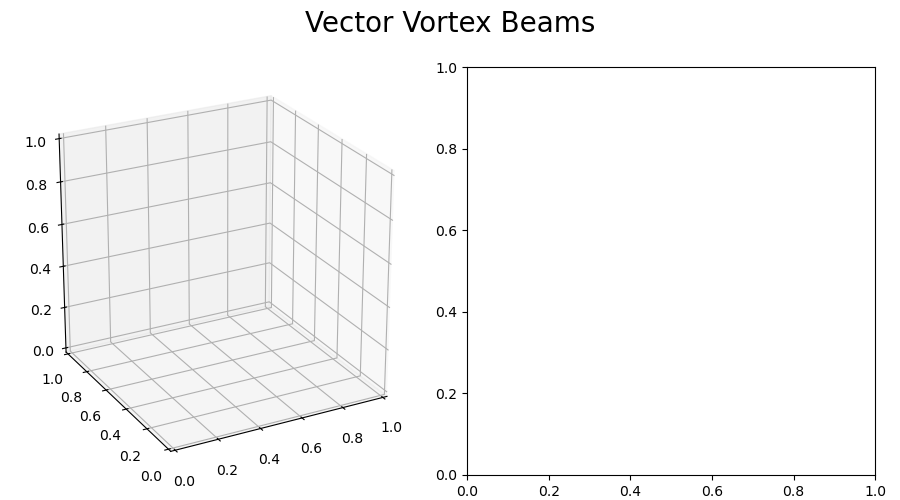

Output()

In [4]:
fig, ax = plt.subplots(1,2, figsize=(9,5))
axPO = fig.add_subplot(1, 2, 1, projection='3d')
# ax3D = fig.add_subplot(1, 3, 3, projection='3d')
fig.delaxes(ax[0])
# fig.delaxes(ax[2])

beta = widgets.FloatSlider(value=0, min=0., max=1, step=1/50 ,description='beta (pi)')
alpha = widgets.FloatSlider(value=0, min=0., max=2, step=1/50 ,description='alpha (pi)')
t = widgets.FloatSlider(value=0, min=0., max=1, step=1/50 ,description='t (period)')
T = np.arange(0, 2*np.pi, 0.07)
rho = np.linspace(0, 2*W, 200)
phi = np.linspace(0, 2*np.pi, 200)
rho, phi = np.meshgrid(rho, phi)
X, Y = rho*np.cos(phi), rho*np.sin(phi)
l1 = widgets.IntText(value=1, min=0, max=10, step=1, description='l:', disabled=False)
l2 = widgets.IntText(value=-1, min=0, max=10, step=1, description='l\':', disabled=False)
p = widgets.IntText(value=0, min=0, max=10, step=1, description='p:', disabled=False)
sigma1 = 1
sigma2 = -1

axPO.set_aspect('equal', adjustable='box')
ax[1].set_aspect('equal', adjustable='box')
# ax3D.set_aspect('equal', adjustable='box')

U, V = np.mgrid[0:2*np.pi:30j, 0:np.pi:30j]
wx = np.cos(U) * np.sin(V)
wy = np.sin(U) * np.sin(V)
wz = np.cos(V)

o = np.linspace(0,2*np.pi,30, endpoint=True)
c = np.linspace(0, np.pi,15, endpoint=True)

def need(l1,l2,p,t,beta,alpha):
    t = t*2*np.pi/w
    beta = beta*np.pi
    alpha = alpha*np.pi
    axPO.cla()
    ax[1].cla()
    # ax3D.cla()

    axPO.plot_wireframe(wx, wy, wz, rcount=16, ccount=13, color=[0.154, 0.8059, 0.0394,0.15])
    axPO.plot_surface(wx, wy, wz, rcount=16, ccount=13, color=[0.154, 0.8059, 0.0394,0.05])
    
    qx =1*np.cos(alpha) * np.sin(beta)
    qy =1*np.sin(alpha) * np.sin(beta)
    qz =1*np.cos(beta)
    axPO.quiver(0, 0, 0, qx, qy, qz, color=[0.547, 0.152, 0.996])
    axPO.quiver(0, 0, 0, 0.3, 0, 0, color='k')
    axPO.quiver(0, 0, 0, 0, 0.3, 0, color='k')
    axPO.quiver(0, 0, 0, 0, 0, 0.3, color='k')

    axPO.plot(np.sin(beta)*np.cos(o), np.sin(beta)*np.sin(o), np.cos(beta)+(o*0) , linestyle='dotted', color=[0.547, 0.152, 0.996, 0.8])
    axPO.plot(np.sin(c)*np.cos(alpha), np.sin(c)*np.sin(alpha), np.cos(c) , linestyle='dotted', color=[0.547, 0.152, 0.996, 0.8])
    

    for i in np.linspace(0, 2*np.pi, 9, endpoint=True):
        for R in np.linspace(W/2, 2*W, 4 ,endpoint=True):
            x = R*np.cos(i)
            y = R*np.sin(i)
            a = ux(i,R,l1,l2,p,beta,alpha) 
            b = uy(i,R,sigma1,sigma2,l1,l2,p,beta,alpha) 
            ax[1].plot(x+a* np.exp(-complex(0,1)*w*T),y+b* np.exp(-complex(0,1)*w*T),linestyle=':',color="gray") 
            ax[1].quiver(x, y, np.real(a* np.exp(-complex(0,1)*w*t)) , np.real(b* np.exp(-complex(0,1)*w*t)), scale=5.8, color="k" )  

    ax[1].plot(W*np.cos(T),W*np.sin(T),linestyle=':',color="green",label='beam waist W=1.5 um') 
    print('alpha=',format(alpha/np.pi,'.3f'),'𝜋 beta=',format(beta/np.pi,'.3f'),'𝜋' )

    # ax[2].contourf(X, Y, uintensity(phi,rho,sigma1,sigma2,l1,l2,p,beta,alpha), levels=np.linspace(0,0.7,100), cmap='gist_yarg' )
    # ax[2].plot(W*np.cos(T),W*np.sin(T),linestyle=':',color="green",label='beam waist W=1.5 um') 

    
    axPO.text2D(0.05, 0.95, 'Poincaré sphere \nbeta='+str(format(beta/np.pi,'.2f'))+'$\pi$ alpha='+str(format(alpha/np.pi,'.2f'))+'$\pi$', transform=axPO.transAxes)
    axPO.text(0.3, 0, 0, "$\hat{x}$", color='k')
    axPO.text(0, 0.3, 0, "$\hat{y}$", color='k')
    axPO.text(0, 0, 0.3, "$\hat{z}$", color='k')
    axPO.text(0, 0, 1.2, "|$\sigma\,="+str(sigma1)+",\,l\,$⟩", color='k',fontsize=9)
    axPO.text(0, 0, -1.3, "|$\sigma^{'}\,="+str(sigma2)+",\,l^{'}\,$⟩", color='k',fontsize=9)
    axPO.set_xlabel('x')
    axPO.set_ylabel('y')
    axPO.set_zlabel('z')
    axPO.set_xlim(-1,1)
    axPO.set_ylim(-1,1)
    axPO.set_zlim(-1,1)
    x_major_locator=MultipleLocator(0.5)
    y_major_locator=MultipleLocator(0.5)
    z_major_locator=MultipleLocator(0.5)
    axPO.xaxis.set_major_locator(x_major_locator)
    axPO.yaxis.set_major_locator(y_major_locator)
    axPO.zaxis.set_major_locator(z_major_locator)
    ax[1].legend()
    ax[1].set_title('real space polarization')
    ax[1].set_xlabel('x (um)')
    ax[1].set_ylabel('y (um)')
    ax[1].set_xlim(-2*W,2*W)
    ax[1].set_ylim(-2*W,2*W)


plt.suptitle('Vector Vortex Beams' ,fontsize=20)
axPO.view_init(24, -118, 0)                 #ax.view_init(elev, azim, roll)
# plt.colorbar(ax[2].contourf(X, Y, uintensity(phi,rho,sigma1,sigma2,0,0,0,0,0), levels=np.linspace(0,0.7,100), cmap='gist_yarg'),  ax=ax[3], ticks=np.linspace(0,0.7, 5), shrink=0.7, location='left')    
plt.tight_layout(pad=1)
plt.show()

out = widgets.interactive_output(need, {'l1':l1, 'l2':l2, 'p':p, 't':t, 'beta':beta, 'alpha':alpha})
ui = widgets.VBox([widgets.Label('time:'), widgets.HBox([t]), widgets.Label('coefficient:'), widgets.HBox([l1,l2,p]), widgets.Label('parameter:'), widgets.HBox([beta,alpha]) ])
display(ui , out )



# C:\Users\USER\Documents\大二資料\code              #存檔位置
# ffmpeg –r 20 –i direction_%01d.png direction.avi  #輸出指令

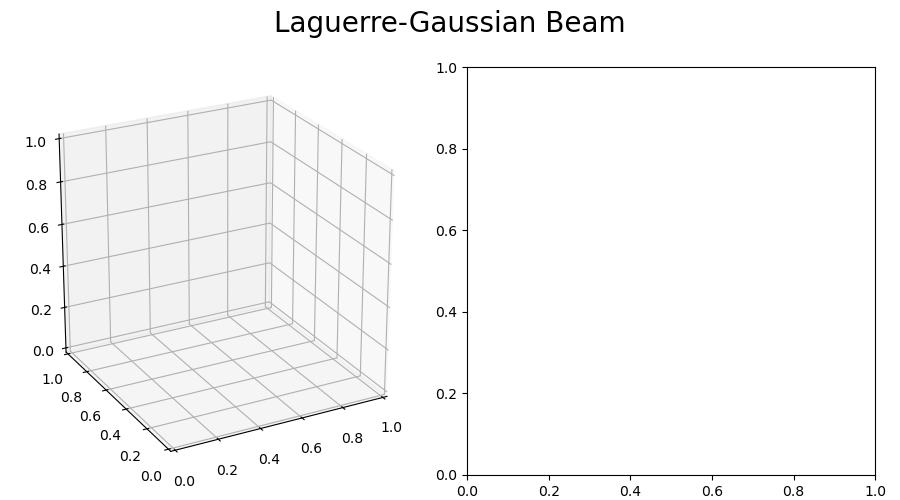

Output()

In [5]:
fig, ax = plt.subplots(1,2,figsize=(9,5))
ax3D = fig.add_subplot(1, 2, 1, projection='3d')
fig.delaxes(ax[0])
# fig.delaxes(ax[3])

beta = widgets.FloatSlider(value=0, min=0., max=1, step=1/50 ,description='beta (pi)')
alpha = widgets.FloatSlider(value=0, min=0., max=2, step=1/50 ,description='alpha (pi)')
t = widgets.FloatSlider(value=0, min=0., max=1, step=1/50 ,description='t (period)')
T = np.arange(0, 2*np.pi, 0.02)
rho = np.linspace(0, 2*W, 200)
phi = np.linspace(0, 2*np.pi, 200)
rho, phi = np.meshgrid(rho, phi)
X, Y = rho*np.cos(phi), rho*np.sin(phi)
l = widgets.IntText(value=1, min=0, max=10, step=1, description='l:', disabled=False)
p = widgets.IntText(value=0, min=0, max=10, step=1, description='p:', disabled=False)

ax3D.set_aspect('equal', adjustable='box')
ax[1].set_aspect('equal', adjustable='box')
# ax[2].set_aspect('equal', adjustable='box')

U, V = np.mgrid[0:2*np.pi:30j, 0:np.pi:30j]
wx = np.cos(U) * np.sin(V)
wy = np.sin(U) * np.sin(V)
wz = np.cos(V)

o = np.linspace(0,2*np.pi,30, endpoint=True)
c = np.linspace(0, np.pi,15, endpoint=True)

def need(l,p,t,beta,alpha):
    t = t*2*np.pi/w
    beta = beta*np.pi
    alpha = alpha*np.pi
    ax3D.cla()
    ax[1].cla()
    # ax[2].cla()

    ax3D.plot_wireframe(wx, wy, wz, rcount=16, ccount=13, color=[0.154, 0.8059, 0.0394,0.15])
    ax3D.plot_surface(wx, wy, wz, rcount=16, ccount=13, color=[0.154, 0.8059, 0.0394,0.05])
    
    qx =1*np.cos(alpha) * np.sin(beta)
    qy =1*np.sin(alpha) * np.sin(beta)
    qz =1*np.cos(beta)
    ax3D.quiver(0, 0, 0, qx, qy, qz, color=[0.547, 0.152, 0.996])
    ax3D.quiver(0, 0, 0, 0.3, 0, 0, color='k')
    ax3D.quiver(0, 0, 0, 0, 0.3, 0, color='k')
    ax3D.quiver(0, 0, 0, 0, 0, 0.3, color='k')

    ax3D.plot(np.sin(beta)*np.cos(o), np.sin(beta)*np.sin(o), np.cos(beta)+(o*0) , linestyle='dotted', color=[0.547, 0.152, 0.996, 0.8])
    ax3D.plot(np.sin(c)*np.cos(alpha), np.sin(c)*np.sin(alpha), np.cos(c) , linestyle='dotted', color=[0.547, 0.152, 0.996, 0.8])
    

    for i in np.linspace(0, 2*np.pi, 9, endpoint=True):
        for R in np.linspace(W/2, 2*W, 4 ,endpoint=True):
            x = R*np.cos(i)
            y = R*np.sin(i)
            a = np.cos(beta/2)*u(i,R,l,p)/np.sqrt(2)
            b = np.sin(beta/2)*np.exp(complex(0,1)*alpha)*u(i,R,l,p)/np.sqrt(2)
            ax[1].plot(x+a* np.exp(-complex(0,1)*w*T),y+b* np.exp(-complex(0,1)*w*T),linestyle=':',color="gray") 
            ax[1].quiver(x, y, np.real(a* np.exp(-complex(0,1)*w*t)) , np.real(b* np.exp(-complex(0,1)*w*t)), scale=5.8, color="k" )   


    ax[1].plot(W*np.cos(t),W*np.sin(t),linestyle=':',color="green",label='beam waist W=1.5 um') 
    print('alpha=',format(alpha/np.pi,'.3f'),'𝜋 beta=',format(beta/np.pi,'.3f'),'𝜋' )

    # conto = ax[2].contourf(X, Y, np.abs(u(phi,rho,l,p)), levels=np.linspace(0,1,100), cmap='gist_yarg' )
    # ax[2].plot(W*np.cos(t),W*np.sin(t),linestyle=':',color="green",label='beam waist W=1.5 um') 

    
    ax3D.text2D(0.05, 0.95, 'Poincaré sphere \nbeta='+str(format(beta/np.pi,'.2f'))+'$\pi$ alpha='+str(format(alpha/np.pi,'.2f'))+'$\pi$', transform=ax3D.transAxes)
    ax3D.text(0.3, 0, 0, "$\hat{x}$", color='k')
    ax3D.text(0, 0.3, 0, "$\hat{y}$", color='k')
    ax3D.text(0, 0, 0.3, "$\hat{z}$", color='k')
    ax3D.text(0, 0, 1.4, "|$\hat{\epsilon}^x$⟩", color='k')
    ax3D.text(0, 0, -1.4, "|$\hat{\epsilon}^y$⟩", color='k')
    ax3D.set_xlabel('x')
    ax3D.set_ylabel('y')
    ax3D.set_zlabel('z')
    ax3D.set_xlim(-1,1)
    ax3D.set_ylim(-1,1)
    ax3D.set_zlim(-1,1)
    x_major_locator=MultipleLocator(0.5)
    y_major_locator=MultipleLocator(0.5)
    z_major_locator=MultipleLocator(0.5)
    ax3D.xaxis.set_major_locator(x_major_locator)
    ax3D.yaxis.set_major_locator(y_major_locator)
    ax3D.zaxis.set_major_locator(z_major_locator)
    ax[1].legend()
    ax[1].set_title('real space polarization')
    ax[1].set_xlabel('x (um)')
    ax[1].set_ylabel('y (um)')
    ax[1].set_xlim(-2*W,2*W)
    ax[1].set_ylim(-2*W,2*W)
    # ax[2].set_title('real space intensity')
    # ax[2].set_xlabel('x (um)')
    # ax[2].set_ylabel('y (um)')
    # ax[2].set_xlim(-2*W,2*W)
    # ax[2].set_ylim(-2*W,2*W)

plt.suptitle('Laguerre-Gaussian Beam' ,fontsize=20)
ax3D.view_init(24, -118, 0)                 #ax.view_init(elev, azim, roll)
# plt.colorbar(ax[2].contourf(X, Y, np.abs(u(phi,rho,0,0)), levels=np.linspace(0,1,100), cmap='gist_yarg'),  ax=ax[3], ticks=np.linspace(0,1, 5), shrink=0.7, location='left')    
plt.tight_layout(pad=1)
plt.show()


out = widgets.interactive_output(need, {'l':l, 'p':p, 't':t, 'beta':beta, 'alpha':alpha})
ui = widgets.VBox([widgets.Label('time:'), widgets.HBox([t]), widgets.Label('coefficient:'), widgets.HBox([l,p]), widgets.Label('parameter:'), widgets.HBox([beta,alpha]) ])
display(ui , out )



# C:\Users\USER\Documents\大二資料\code              #存檔位置
# ffmpeg –r 20 –i direction_%01d.png direction.avi  #輸出指令

In [6]:
# r = 1.5*W
# xlayer = 9
# ylayer = 9
# zlayer = 3
# x, y, z = np.meshgrid(np.linspace(-r, r, xlayer), np.linspace(-r, r, ylayer), np.linspace(-530, 530, zlayer))

# # get colormap
# ncolors = xlayer*ylayer*zlayer
# color_array = plt.get_cmap('gist_yarg')(np.linspace(0, ncolors, ncolors, endpoint=True))

# # change alpha values
# ncolor = np.linspace(-1,1,ncolors)
# A = np.linspace(0,1,ncolors)
# # A = np.abs(ncolor)

# # color_array[:,-1] = np.linspace(1.0,0.0,ncolors)
# color_array[:,-1] = A

# # create a colormap object
# map_object = LinearSegmentedColormap.from_list(name='customized_colorbar',colors=color_array)

# # register this new colormap with matplotlib
# plt.register_cmap(cmap=map_object)

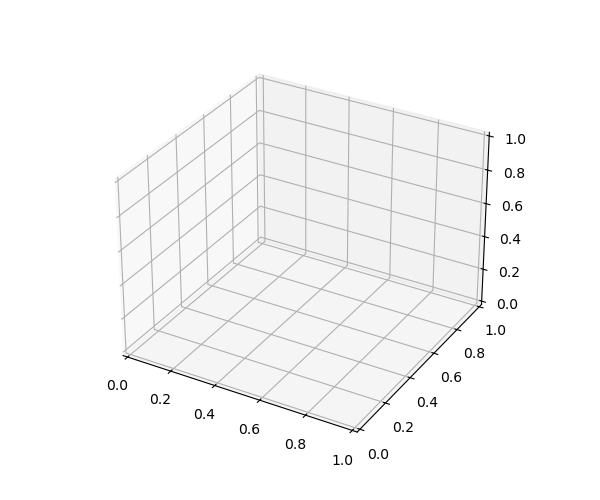

Output()

In [7]:
#畫布創造
fig = plt.figure(figsize=(6, 5))
plt.subplots_adjust(wspace = 0.6)
ax3D = fig.add_subplot(projection='3d')

#滑桿創造
beta = widgets.FloatSlider(value=0, min=0., max=1.0, step=1/100 ,description='beta (pi)')
alpha = widgets.FloatSlider(value=0, min=0., max=2.0, step=1/100 ,description='alpha (pi)')
l = widgets.IntText(value=1, min=0, max=10, step=1, description='l:', disabled=False)
p = widgets.IntText(value=0, min=0, max=10, step=1, description='p:', disabled=False)
t = widgets.FloatSlider(value=0, min=0., max=1, step=1/50 ,description='t (period)',readout_format='.2f')
R=1.5*W
xlayer = 9
ylayer = 9
zlayer = 5
x, y, z = np.meshgrid(np.linspace(-R, R, xlayer), np.linspace(-R, R, ylayer), np.linspace(-530, 530, zlayer))

#滑桿驅動   
def need3D(l,p,beta,alpha,t):
    t = t*2*np.pi/w
    beta = beta*np.pi
    alpha = alpha*np.pi
    ax3D.cla()    

  
    a = np.cos(beta/2) *u(np.arctan2(y,x),np.sqrt(x**2+y**2),l,p)*np.exp(-complex(0,1)*w*t)/np.sqrt(2)
    b = np.sin(beta/2)*np.exp(complex(0,1)*alpha) *u(np.arctan2(y,x),np.sqrt(x**2+y**2),l,p)*np.exp(-complex(0,1)*w*t)/np.sqrt(2)
    #軸上綠偏振箭頭
    ax3D.quiver(x, y, z, a*np.exp(complex(0,1)*k*z[0]), b*np.exp(complex(0,1)*k*z[0]), 0) 
    
    #圖片調整
    ax3D.set_xlabel("x$_{(um)}$", fontsize=16)  
    ax3D.set_ylabel("y$_{(um)}$", fontsize=16)
    ax3D.zaxis.set_rotate_label(False) 
    ax3D.set_zlabel("z$_{(nm)}$", fontsize=16 ,rotation=0)
    ax3D.set_xlim(-1.2*R,1.2*R)
    ax3D.set_ylim(-1.2*R,1.2*R)
    ax3D.set_zlim(-1.5*Lambda,1.5*Lambda)  
    # ax3D.view_init(23, -112, 0)  #ax.view_init(elev, azim, roll)
    ax3D.set_title('LG Beam polerization')
    x_major_locator=MultipleLocator(2)
    y_major_locator=MultipleLocator(2)
    z_major_locator=MultipleLocator(500)
    ax3D.xaxis.set_major_locator(x_major_locator)
    ax3D.yaxis.set_major_locator(y_major_locator)
    ax3D.zaxis.set_major_locator(z_major_locator)

# plt.colorbar(ax3D.contourf(x[0], y[0], x[0]+y[0], zdir='z', offset=0, levels=np.linspace(-1,1,500), cmap='customized_colorbar'), ax=ax3D, format="{x:.2f}", ticks=np.linspace(-1,1, 5), shrink=0.6)  
plt.tight_layout(pad = 3)
plt.show() 


        
#滑桿控制 
out3D = widgets.interactive_output(need3D, { 'l':l, 'p':p , 'beta':beta, 'alpha':alpha, 't': t })
ui = widgets.VBox([widgets.Label('parameter:'), widgets.HBox([t]),
                  widgets.Label('coefficient:'), widgets.HBox([l,p]),
                   widgets.Label('component:'), widgets.HBox([beta,alpha])])
display(ui , out3D )

# cd /d D:\大三資料\code\軌道光                    #存檔位置
# ffmpeg –r 20 –i combine_%01d.png direction.avi  #輸出指令 不要打這行 奇異負號
# ffmpeg -r 20 -i combine_%01d.png direction.avi  #輸出指令
# ffmpeg -r 20 -i combine_%01d.png -b:v 500k direction.avi  #輸出指令